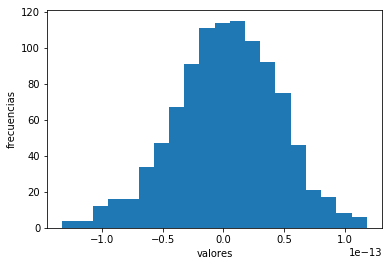

In [2]:
"""Castillo Flores Junior Manuel"""
"""por el teorema del limite central a partir de una distribucion uniforme
    obtendremos una distribucion normal cuando n -> inf , Donde n = numero
    de muestras
"""

import numpy as np
import math
a   = 7**5
b   = 630360016
m   = 2**31-1

def generadorAleatorio(x , semilla):
    x[0]    =   semilla
    for i in range(len(x)-1):
        x[i+1]    =  ( a*x[i] + b ) %   m
    return x
def uniformizar(x):
    u   =   np.ones_like(x)
    u[:]   = x[:]/m
    return u
def convolucion(u,n,media,varianza):
    z   = ( sum(u) - media*n ) / math.sqrt( varianza*n )
    return z

#n   =   100000
semilla =   1024
muestras    = 1000
x   =   np.ones(muestras)
iid = []
u = []
media = []
varianza = []
z = []
for i in range(muestras):
    iid.append(np.array(generadorAleatorio(x,semilla+i)))
    u.append(np.array(uniformizar(iid[i])))
    media.append(np.mean(u[i]))
    varianza.append(np.var(u[i]))

    z.append(convolucion(u[i],muestras,media[i],varianza[i]))
z =np.array(z)
#print ("numeros pseudoaleatorios\n",x)
#print ("numeros pseudoaleatorios uniformizados\n",u)
#print ("normal:",z)

X =  z[:]*muestras + media

import matplotlib.pyplot as plt
%matplotlib inline

cuenta,cajas,ignorar    =   plt.hist(z,20)
plt.xlabel("valores")
plt.ylabel("frecuencias")
plt.show()